# Lending Club Case Study

This is the case study for a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Problem Statement

We need to analyse the scenario for a consumer finance company which specialises in lending various types of loans to urban customers. There are two types of risks, associated with the bank’s decision for approving loan :

*   If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
*   If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

When a person applies for a loan, there are two types of decisions that could be taken by the company:

* **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

 * **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

 * **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

 * **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

* **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Target
Reduce the Credit Loss by using EDA techniques to find driving factors for the defaulting of loan.

## Risk associated with the problem
 - If the applicant is likely to repay the loan, then not approving loan is a loss of business (rejecting loans for non - default).
 - If the applicant is not likely to repay the loan, then approving loan may lead to financial loss (approving loans for default).
The given dataset contains information about past loans and each row represents the loan details of the applicants.


***
# `Data Understanding`
***

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import io
import re
import missingno as msno
import plotly.express as px 
# Warnings library will be used to ignore some warnings
import warnings 
warnings.filterwarnings('ignore')

In [4]:
loan = pd.read_csv(r'C:\Upgrad Program\LendingClubCaseStudy\loanoriginal/loan.csv')

C:\Users\preit\AppData\Local\Temp\ipykernel_1996\2695979216.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv(r'C:\Upgrad Program\LendingClubCaseStudy\loanoriginal/loan.csv')


In [5]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [6]:
loan.shape

(39717, 111)

In [7]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

> To get the better insight of null values, we have used a library "missingno" which will showcase the scenario in more graphical form to understand.

<AxesSubplot:>

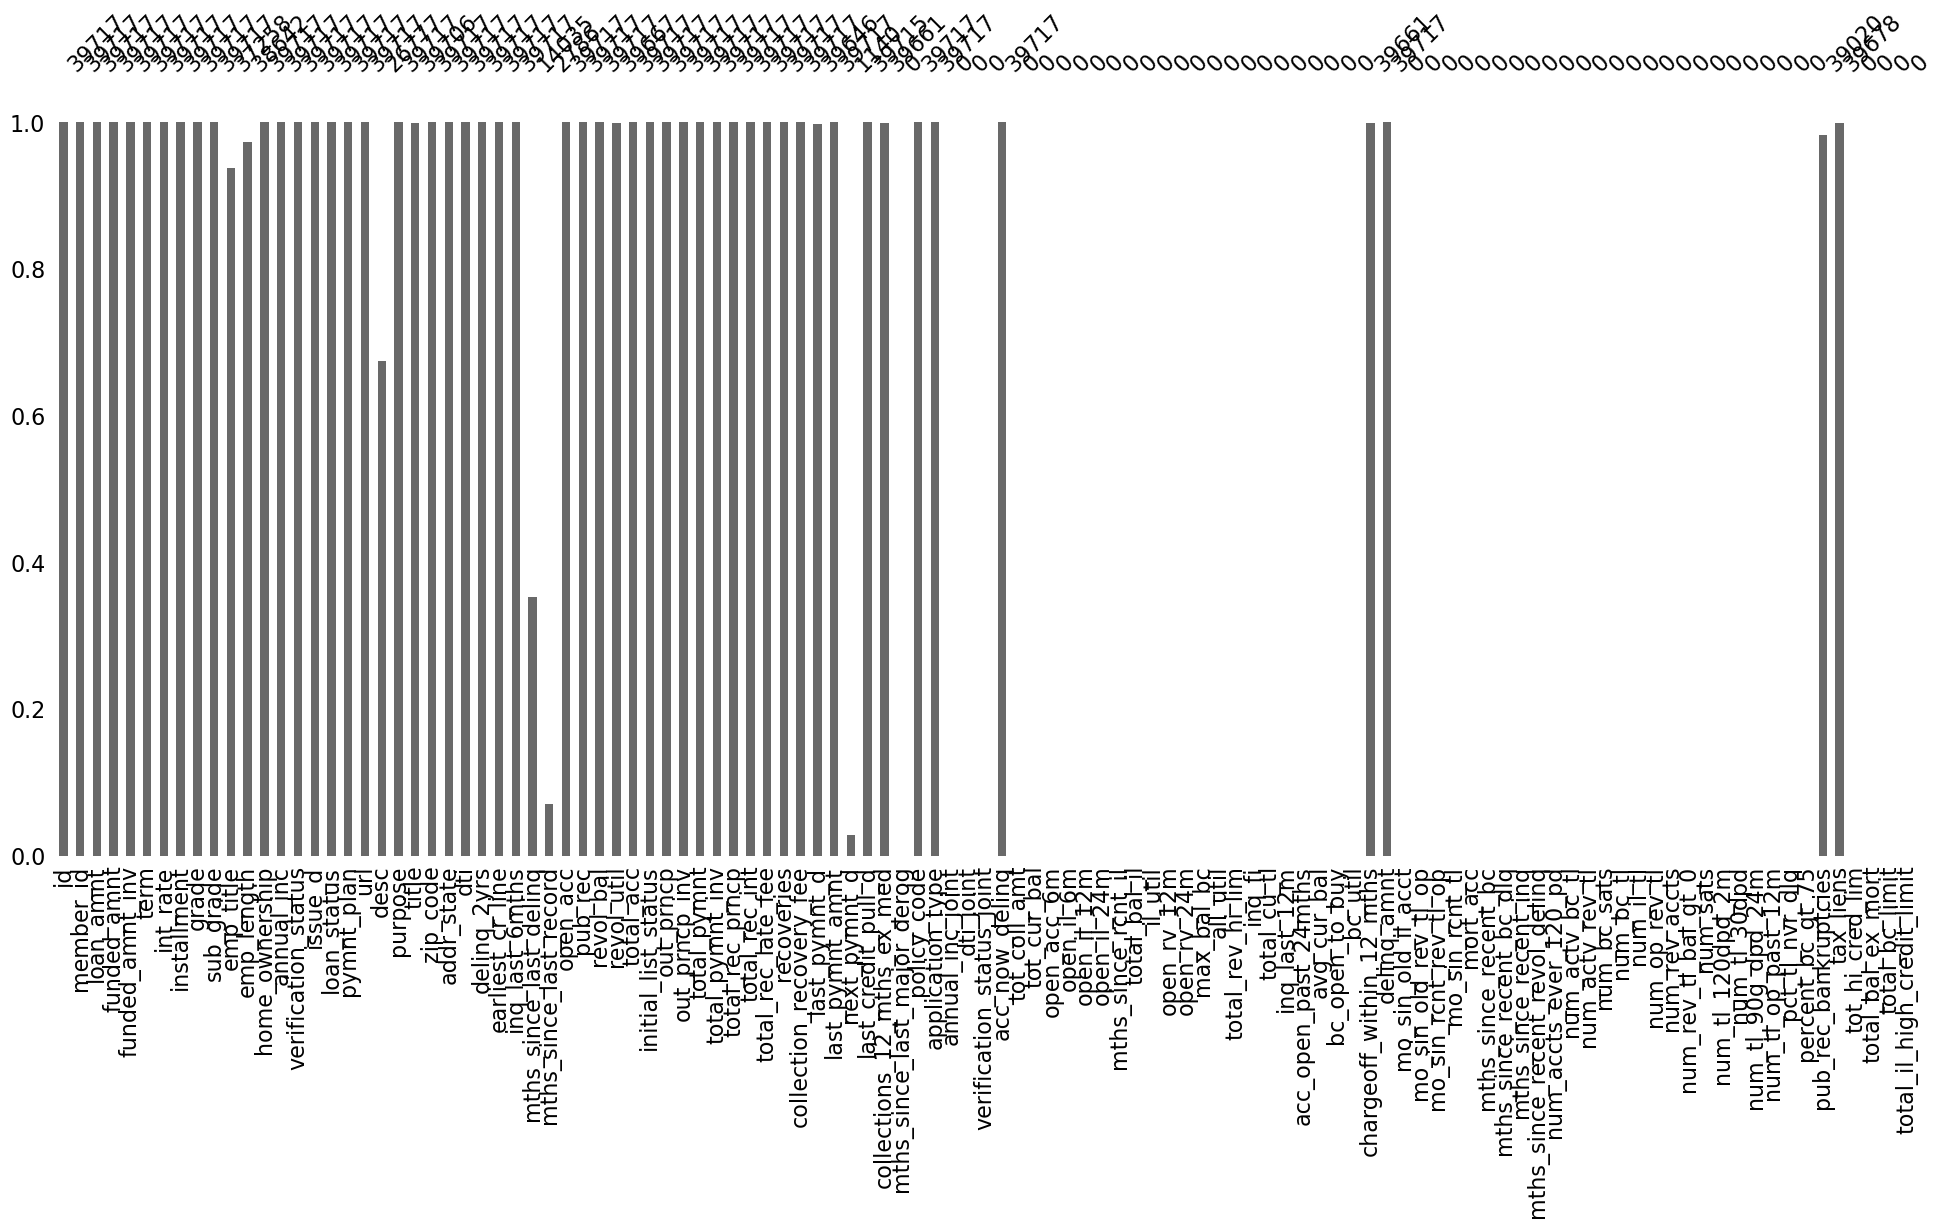

In [8]:
msno.bar(loan)

### From the above graph, it is more clearer now that there are many columns which are almost 80% or above blank. So, we will first remove those columns to make our analysis with more relevant data

In [9]:
# Identify the 80% or more, Null columns and then drop them 
Null_Percentage = loan.isnull().sum()/loan.shape[0]*100
Col_To_Drop = Null_Percentage[Null_Percentage>80].keys()
loan = loan.drop(Col_To_Drop, axis=1)

<AxesSubplot:>

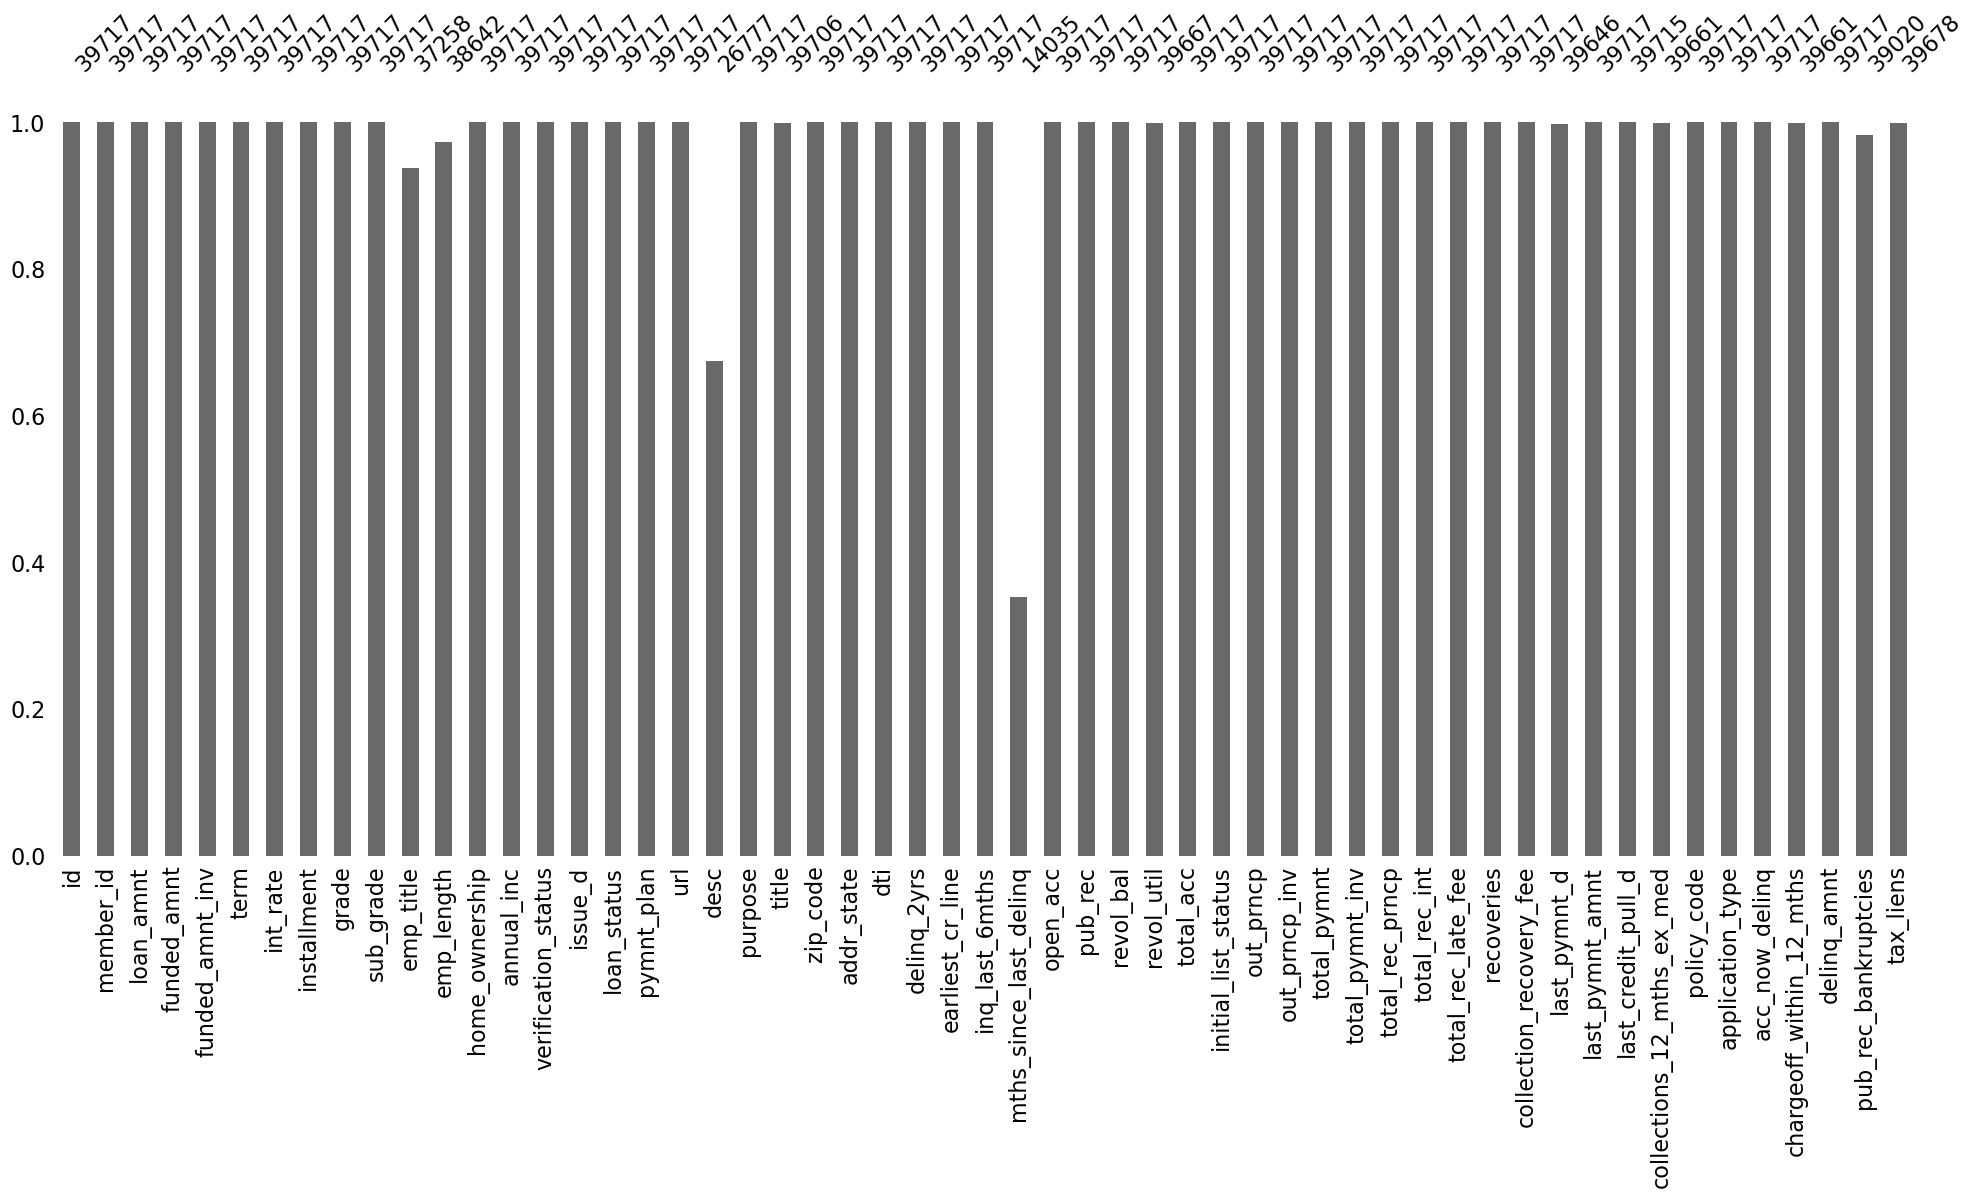

In [10]:
# Visualize the Data Set After removing an Empty Columns
msno.bar(loan)

> Removing some more columns as we could see in the above plot the Empty Percentage is still above 80 for 'desc','mths_since_last_delinq'

In [11]:
loan = loan.drop(['desc','mths_since_last_delinq'], axis=1)

<AxesSubplot:>

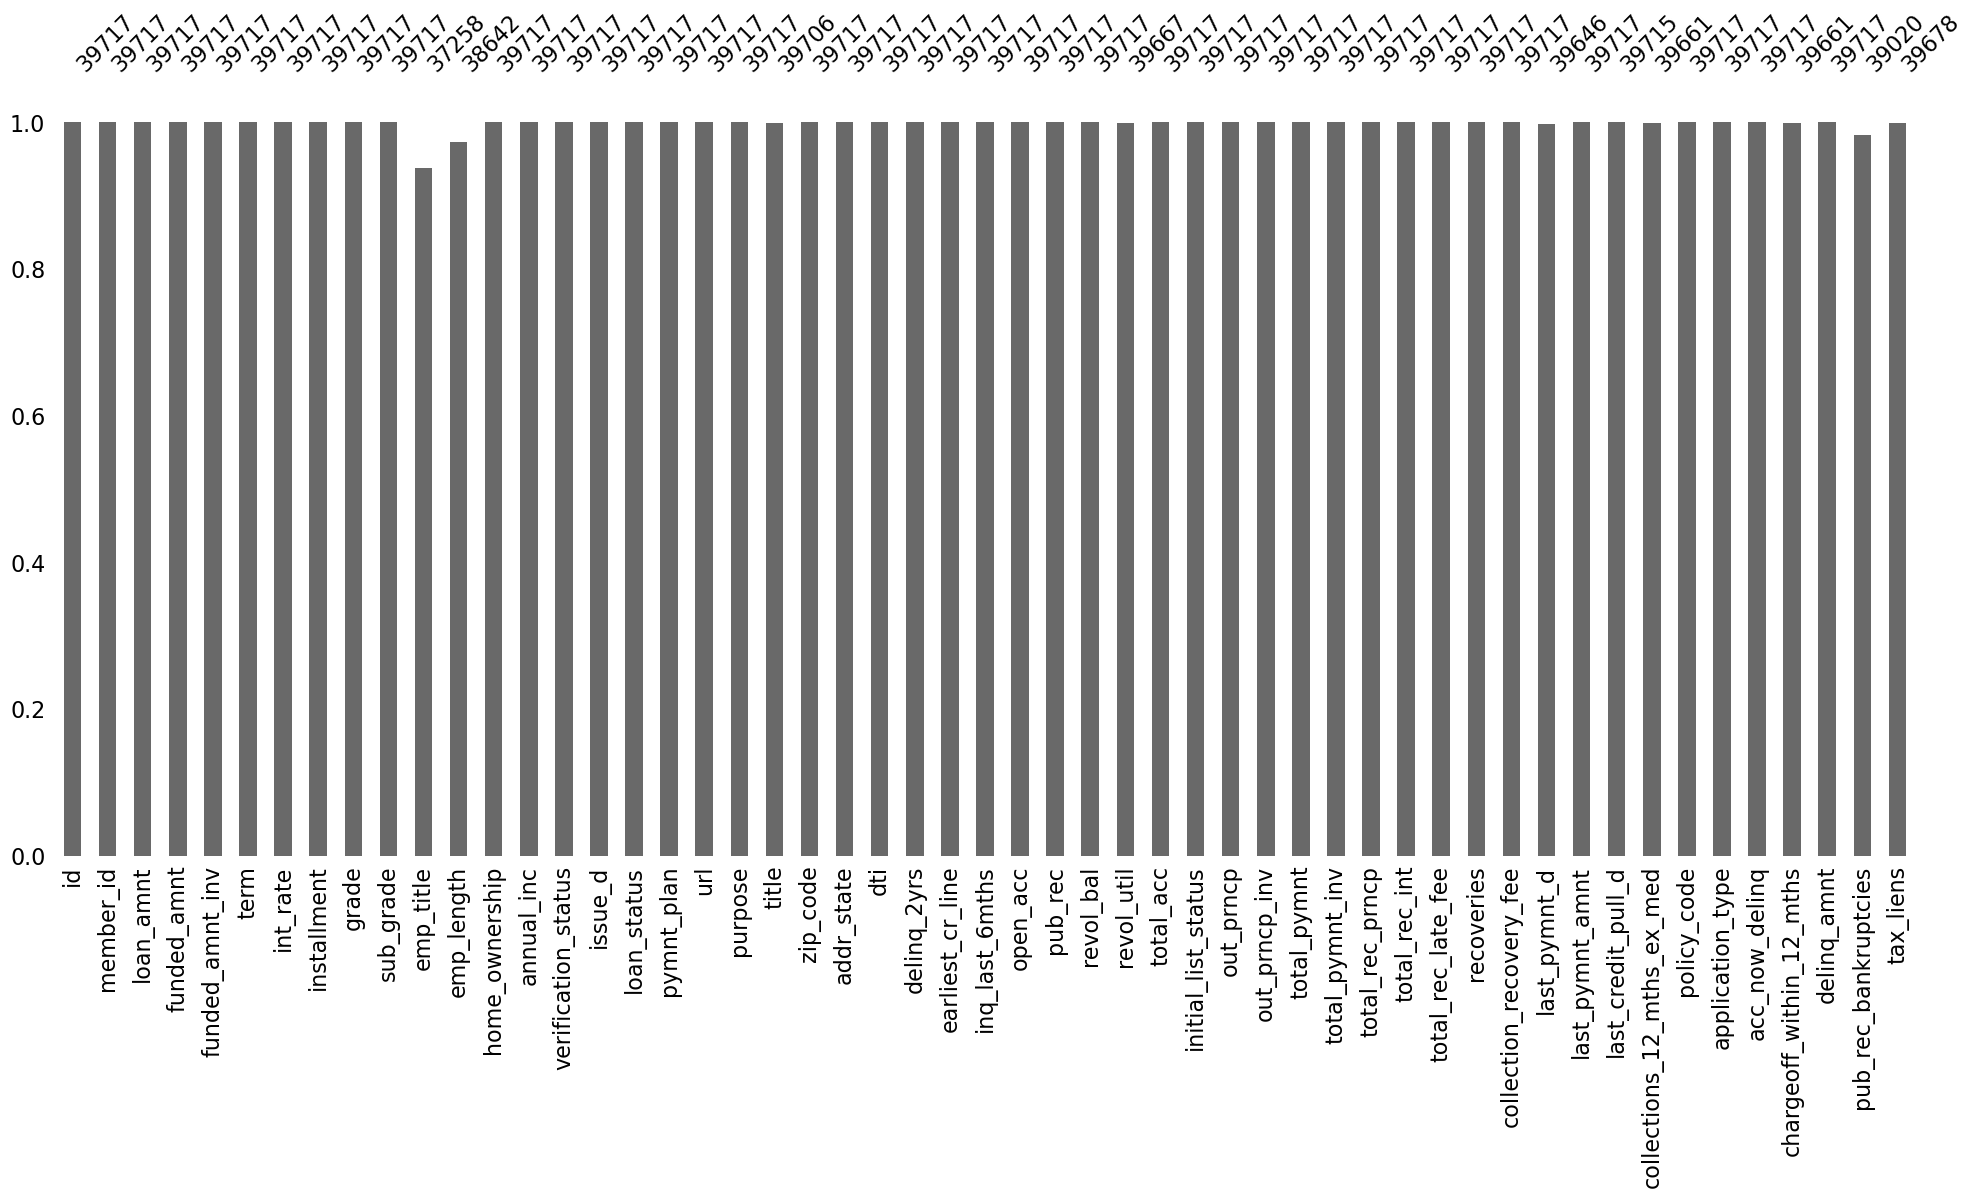

In [12]:
# Visualiz the columns for Empty Values if any
msno.bar(loan)

In [13]:
loan.shape

(39717, 53)

***
# `Data Cleaning`
***

# Now we will remove all the unecessary column, which is irrelevant for our analysis in finding out the default Customer

### After initial cleaning process, we are left with 53 columns, so let's analyse more:
> There are few columns which don't contribute to analysis either because of insufficient information or irrelevant information.Also, we are only considering those factors in which we have user details and their driving criteria for loan defaulting before approving loan. So keeping these in mind, below are the column names listed, which can be removed from our analysis part:

#### List of columns:
* 'delinq_2yrs' : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
* 'earliest_cr_line' : The month the borrower's earliest reported credit line was opened
* 'inq_last_6mths' : The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
* 'total_acc' : The total number of credit lines currently in the borrower's credit file
* 'pub_rec' : Number of derogatory public records
* 'revol_bal' : Total credit revolving balance
* 'revol_util' : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* 'out_prncp' : Remaining outstanding principal for total amount funded
* 'out_prncp_inv' : Remaining outstanding principal for portion of total amount funded by investors
* 'total_pymnt' : Payments received to date for total amount funded
* 'total_pymnt_inv' : Payments received to date for portion of total amount funded by investors
* 'total_rec_prncp' : Principal received to date
* 'total_rec_int' : Interest received to date
* 'total_rec_late_fee' : Late fees received to date
* 'recoveries' : post charge off gross recovery
* 'collection_recovery_fee' : post charge off collection fee
* 'last_pymnt_d' : Last month payment was received
* 'last_pymnt_amnt' : Last total payment amount received
* 'last_credit_pull_d' : The most recent month LC pulled credit for this loan
* 'application_type' : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* 'delinq_amnt' : The past-due amount owed for the accounts on which the borrower is now delinquent.
* 'policy_code' : "publicly available policy_code=1, new products not publicly available policy_code=2"
* 'chargeoff_within_12_mths' : Number of charge-offs within 12 months
* 'acc_now_delinq' : The number of accounts on which the borrower is now delinquent.
* 'collections_12_mths_ex_med' : Number of collections in 12 months excluding medical collections
* 'tax_liens' : Number of tax liens
* 'zip_code' : The first 3 numbers of the zip code provided by the borrower in the loan application.
* 'addr_state' : The state provided by the borrower in the loan application
* 'url' : URL for the LC page with listing data.
* 'id' : A unique LC assigned ID for the loan listing.
* 'member_id' : A unique LC assigned Id for the borrower member.
* 'title' : The loan title provided by the borrower
* 'initial_list_status' : The initial listing status of the loan. Possible values are – W, F i.e Withdrawn or Funded
* 'pymnt_plan' : Indicates if a payment plan has been put in place for the loan
* 'emp_title' : The job title supplied by the Borrower when applying for the loan.*

In [14]:
# Drop Some More Columns which are Insignificant
loan = loan.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','total_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv',
                             'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee','recoveries', 'collection_recovery_fee', 'last_pymnt_d',
                               'last_pymnt_amnt','last_credit_pull_d', 'application_type', 'delinq_amnt','policy_code','chargeoff_within_12_mths', 'acc_now_delinq', 'collections_12_mths_ex_med',
                            'tax_liens', 'zip_code', 'addr_state', 'url','id','member_id','title','initial_list_status', 'pymnt_plan', 'emp_title'], axis=1)

In [15]:
# Shape of the Data after removing the Empty columns and Irrelevant columns
loan.shape

(39717, 18)

In [16]:
# Remaining columns
loan.columns.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'dti',
 'open_acc',
 'pub_rec_bankruptcies']

### Now in our further analysis, we have observed that only those candidates which are categorised as "Fully Paid" and "Charged Off" can be considered for loan approval.
> This is because whose status is "Current" are already availing the loan and hence cannot be put under another procedure for loan in the same bank. Keeping this in mind, we have removed those candidates under "Current" status for loan.

In [17]:
loan = loan[loan.loan_status != "Current"]

In [19]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Basic information about the data now

In [21]:
## Number of rows and columns
print('Number of Columns:',loan.shape[1])
print('Number of Rows:',loan.shape[0])
## Number of missing values
print('Number of missing values:',loan.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',loan.nunique().sum())
## Number of duplicates
print('Number of duplicates:',loan.duplicated().sum())

Number of Columns: 18
Number of Rows: 38577
Number of missing values: 1730
Number of unique values: 33576
Number of duplicates: 0


### Removing and fixing the null values

In [23]:
# Checking for missing values across the dataframe
print(loan.isnull().sum().sort_values(ascending=False))

emp_length              1033
pub_rec_bankruptcies     697
annual_inc                 0
open_acc                   0
dti                        0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
loan_amnt                  0
funded_amnt                0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt_inv            0
home_ownership             0
dtype: int64


| **Column name** | **Count of Null values** |
|---|---|
|  emp_length | 1075  |
|  pub_rec_bankruptcies | 697  |

Above columns has null values, and can be used once we will get to know what is the relevance for the same.

In [26]:
# Checking values in emp_length columns for feasibility of inserting null values
print(loan.emp_length.value_counts())

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64


#### Removing null values in emp_length columns

In [27]:
loan = loan.dropna(subset=['emp_length'])

In [29]:
loan.pub_rec_bankruptcies.value_counts()

0.0    35312
1.0     1530
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

#### In column 'pub_rec_bankruptcies', the data mostly has value 0 which can be subsitued in place of null as that will have no impact on the analysis.

In [30]:
loan.pub_rec_bankruptcies.fillna(0,inplace=True)

In [31]:
# missing values across the dataframe
loan.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec_bankruptcies    0
dtype: int64

# After cleaning of data, we can proceed to verify all the fields are correctly mentioned/utilized for analysis or not. 
* We will remove the strings i.e %,+, > etc. from the columns
* Then we will rename the columns with appropriate name
* Also, type cast the columns, where necessary

In [33]:
loan['int_rate'] = loan.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)

In [34]:
loan.term = loan.term.apply(lambda x: int(x.replace(' months',''))).astype(int)

In [35]:
loan.emp_length = loan.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)

In [37]:
# Setting decimal point limit for all data 
for x in loan.columns:
    if(loan[x].dtype=='float64'):
      loan[x]=loan[x].round(2)


In [38]:
# Renaming the column names for better readability
loan.rename(
    columns={ "revol_util": "revol_util_%", "int_rate": "int_rate_%","term":"term_in_months","emp_length" : "emp_length_in_years" },
    inplace=True,
)

In [113]:
# Split Issue date as Issue Month and Issue Column
loan[['Issue_Month','Issue_Year']] = loan['issue_d'].str.split('-',expand = True)
loan['Issue_Year'] = '20' + loan['Issue_Year']

In [39]:
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv  term_in_months  int_rate_%  \
0       5000         5000           4975.0              36       10.65   
1       2500         2500           2500.0              60       15.27   
2       2400         2400           2400.0              36       15.96   
3      10000        10000          10000.0              36       13.49   
5       5000         5000           5000.0              36        7.90   

   installment grade sub_grade  emp_length_in_years home_ownership  \
0       162.87     B        B2                 10.0           RENT   
1        59.83     C        C4                  0.5           RENT   
2        84.33     C        C5                 10.0           RENT   
3       339.31     C        C1                 10.0           RENT   
5       156.46     A        A4                  3.0           RENT   

   annual_inc verification_status issue_d  loan_status         purpose    dti  \
0     24000.0            Verified  Dec-11   Fully Paid     credit_card  27.65   
1     30000.0     Source Verified  Dec-11  Charged Off             car   1.00   
2     12252.0        Not Verified  Dec-11   Fully Paid  small_business   8.72   
3     49200.0     Source Verified  Dec-11   Fully Paid           other  20.00   
5     36000.0     Source Verified  Dec-11   Fully Paid         wedding  11.20   

   open_acc  pub_rec_bankruptcies  
0         3                   0.0  
1         3                   0.0  
2         2                   0.0  
3        10                   0.0  
5         9                   0.0

***
# `Data Analysis`
***
### `Univariate Analysis`

> Let's first segment the annual income and analyse what is the scenario for outliers in this case

In [54]:
px.box(loan,x='loan_amnt',width=750,height=350,title='Distribution of customers on the basis of loan amount sanctioned',labels={'loan_amnt':'Loan Amount'}).show()

In [55]:
loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     60000.0
0.75     83000.0
0.90    116672.4
0.95    142000.0
0.97    166213.0
0.98    189996.0
0.99    235000.0
Name: annual_inc, dtype: float64

> It is clear that the outliers are enough above 95% of the case, as there is a huge increase after that range. So considering the threshold of 95%, let's remove the outliers

In [63]:
# Removing the outliers above 95%
loan = loan[loan.annual_inc <= loan['annual_inc'].quantile(0.99)]

In [64]:
px.box(loan,x='loan_amnt',title='Distribution of customers on the basis of loan amount sanctioned, after removing outliers',labels={'loan_amnt':'Loan Amount'}).show()

***
### Now let's move on to other parameters such as dti, installments, interest rate, funded amount, loan amount etc, and analyze what can we get from the trend

In [67]:
px.box(loan,x='dti',title='Distribution of Debt To Income Ratio',labels={'dti':'DTI ratio'}).show()

In [68]:
px.box(loan,x='loan_amnt',title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

In [69]:
px.box(loan,x='funded_amnt',title='Distribution of Funded Amount',labels={'funded_amnt':'Funded Amount'}).show()

In [71]:
px.box(loan,x='int_rate_%',title='Distribution of Interest Rate',labels={'int_rate_%':'Interest Rate'}).show()

In [72]:
px.box(loan,x='installment',title='Distribution of Installments',labels={'installment':'Installments'}).show()

## It is clear that almost outliers are removed and we can proceed with our analysis

> **Let's check the count for loan status categories**

<AxesSubplot:xlabel='loan_status', ylabel='count'>

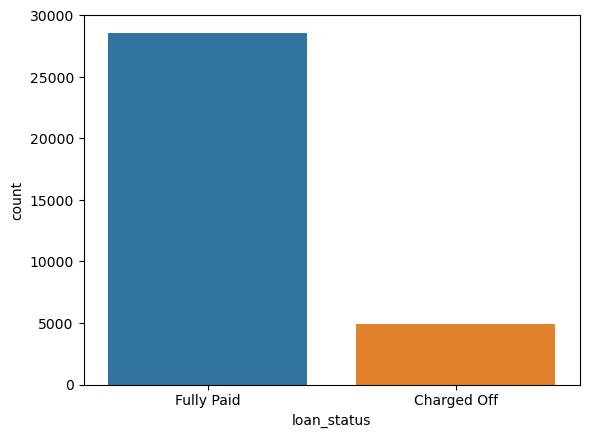

In [74]:
sn.countplot(x = 'loan_status', data = loan)

#### Let's analyse more and compare with other categories to get more insigths
> Category : Loan Amount

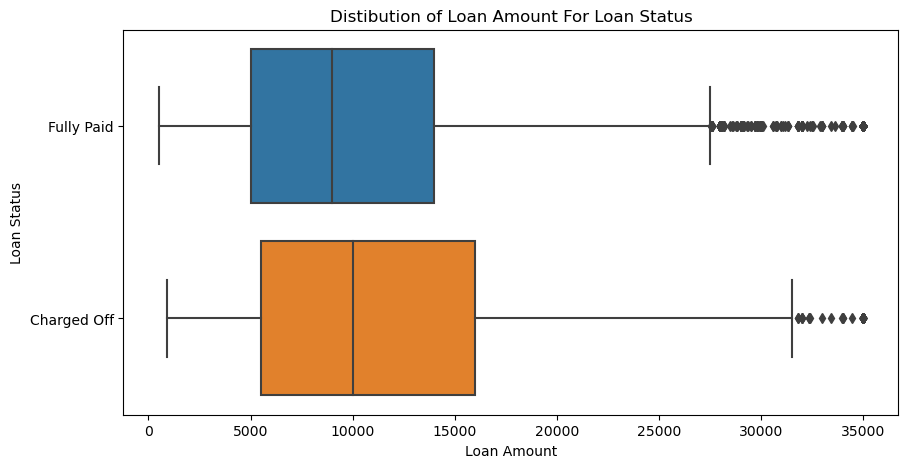

In [84]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sn.boxplot(data=loan,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

**Insights:** The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

> Category : Term in months

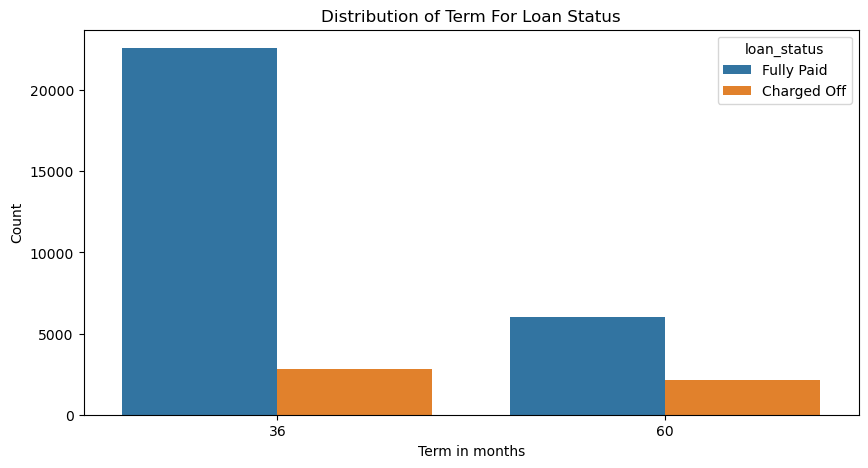

In [87]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sn.countplot(data=loan,x='term_in_months',hue='loan_status')
plt.xlabel('Term in months')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

**Insights:** The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

> Category : DTI

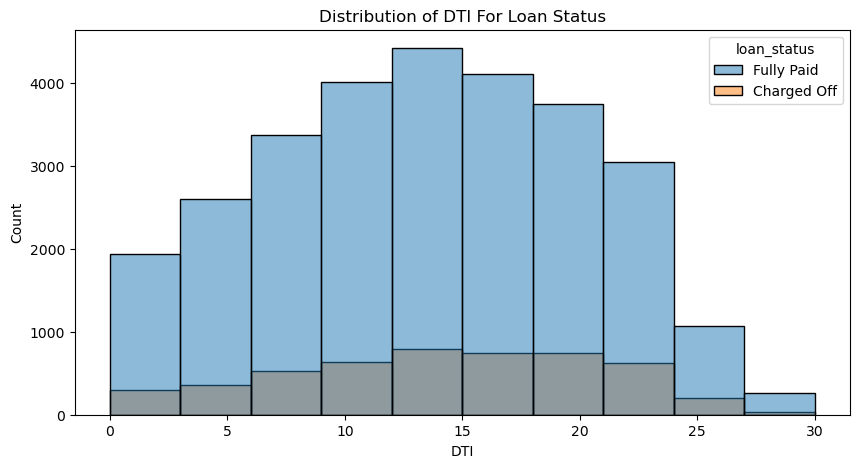

In [88]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sn.histplot(data=loan,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

**Insight:** The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

> Category : Home Ownership

In [89]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [90]:
loan.home_ownership.value_counts()

RENT        17106
MORTGAGE    13818
OWN          2538
OTHER          92
Name: home_ownership, dtype: int64

- There are only 3 NONE categories, so replacing the None Values with Other won't affect much on the data 

In [91]:
loan['home_ownership'] = loan['home_ownership'].replace('NONE','OTHER')

In [92]:
# Get the Final Unique Values
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

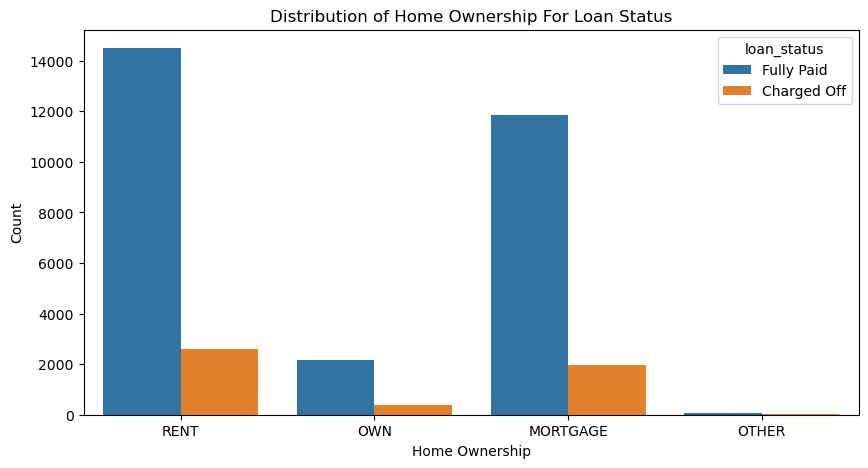

In [94]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sn.countplot(data=loan,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.show()

**Insights:** The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent. Also, if we ignore "Fully Paid" category (as they are less likely to be defaulters), Let's dive in deep with "Charged Off" category which will give better picture 

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

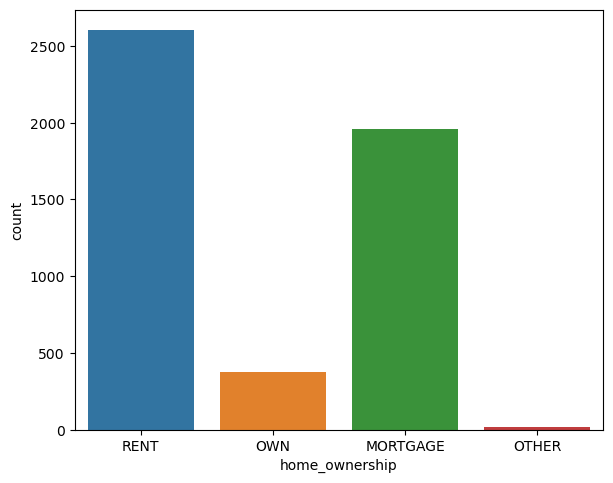

In [98]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sn.countplot(x = 'home_ownership', data = loan[loan['loan_status']=='Charged Off'])

> Let's dig deep what is the purpose of taking loans for 'Charged Off' category

<AxesSubplot:xlabel='count', ylabel='purpose'>

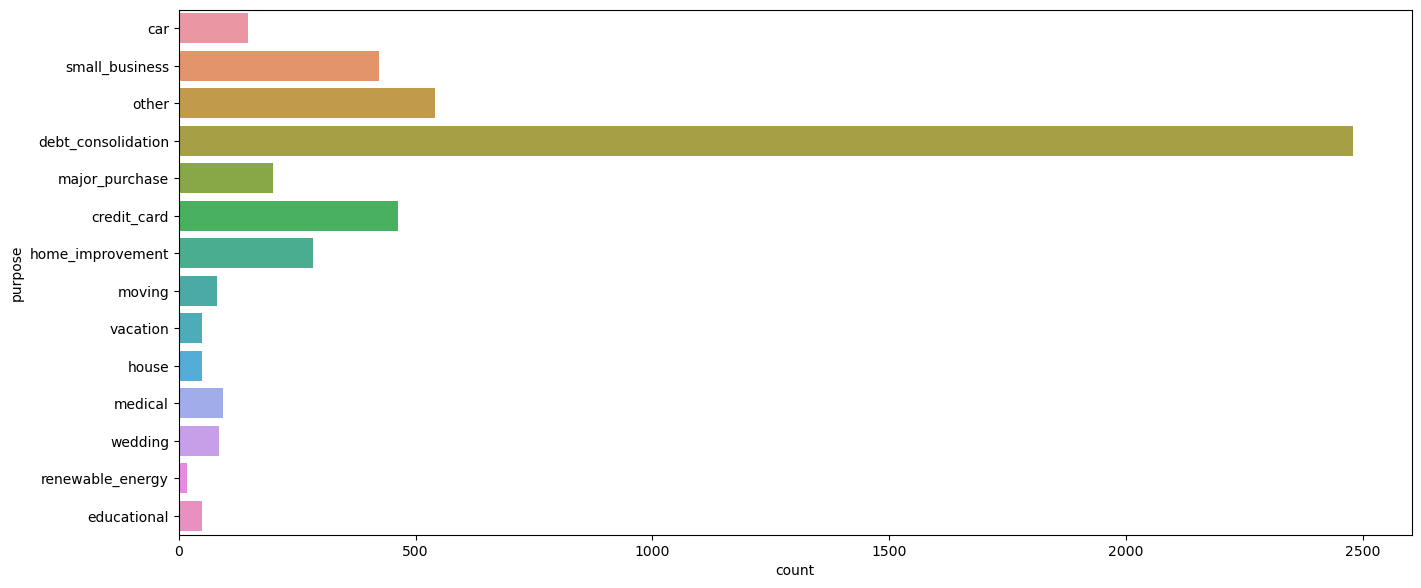

In [99]:
plt.figure(figsize = (35,15))
plt.subplot(221)
sn.countplot(y ='purpose', data=loan[loan['loan_status'] == 'Charged Off'])

**Insights** : It is somewhere clear that the customers whose purpose is to make the adjustments for debt_consolidation are more likely the defaulters. Other than that purpose, customers can be considered under the radar for loan sanctioning.

> Category : Annual Income

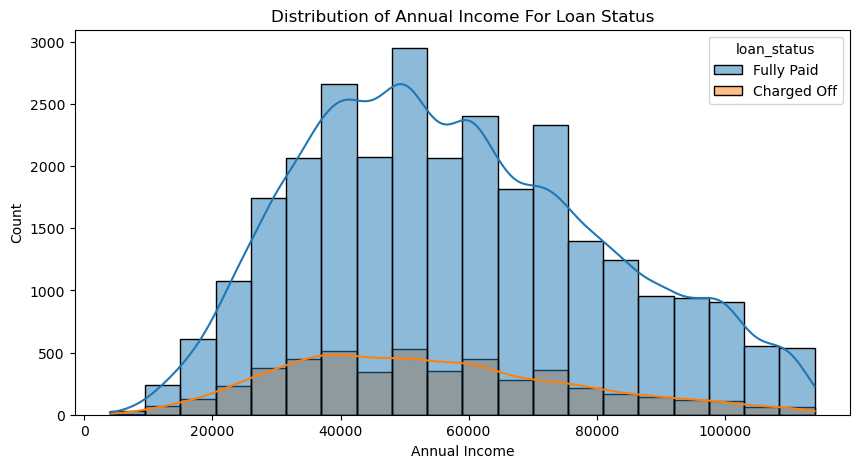

In [100]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sn.histplot(data=loan,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

**Insight:** 
* Burrowers with less 50000 annual income are less likely to default
* Higher annual income are less likely to default.

> Category : Public Record Bankrupctcies and Verification Status

<AxesSubplot:xlabel='verification_status', ylabel='count'>

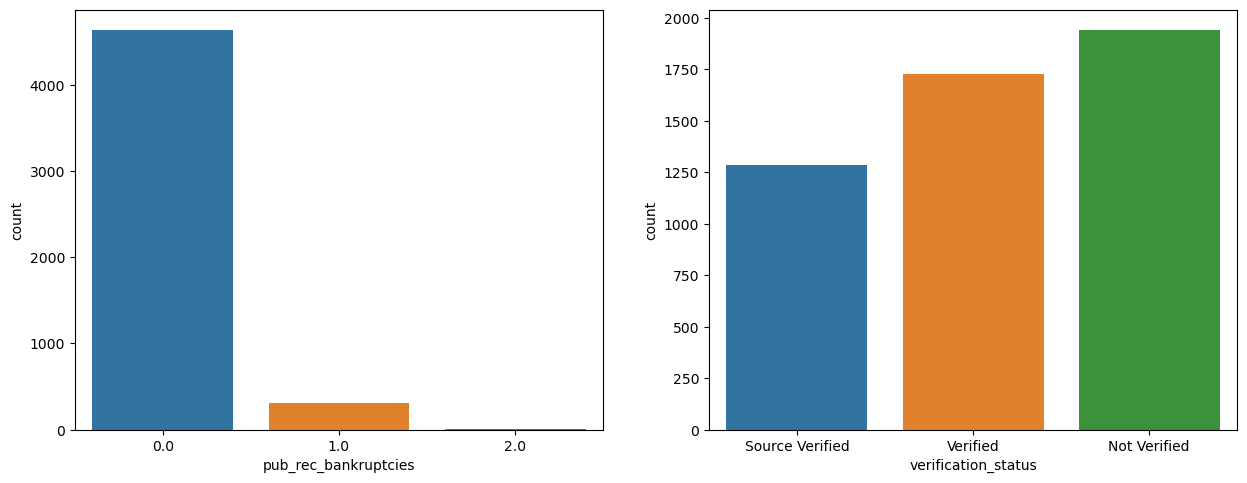

In [110]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sn.countplot(x = 'pub_rec_bankruptcies', data = loan[loan['loan_status']=='Charged Off'])
plt.subplot(222)
sn.countplot(x = 'verification_status', data = loan[loan['loan_status']=='Charged Off'])

**Insights**:
* It is quite contradictory that with no public record bankruptcy, people are more likely to be charged off. So, we can't predict anything with this data
* It is clear from the graph that people with source verified are less likely to be considered as defaulters. 

> Category : Issue Month and Issue Year

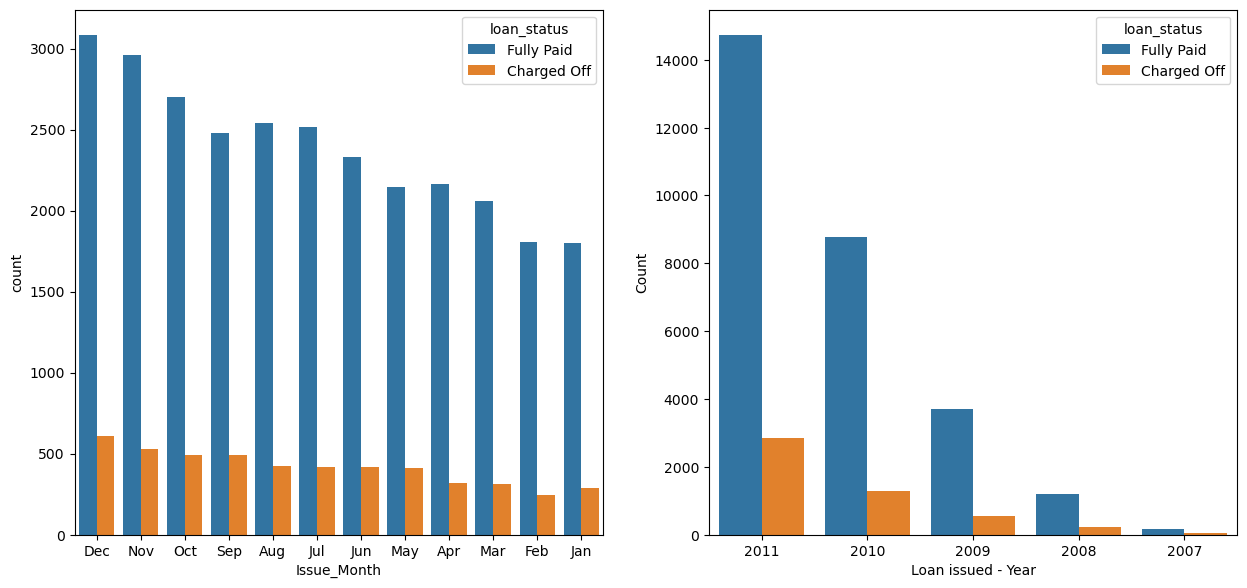

In [115]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sn.countplot(x='Issue_Month', data=loan,hue='loan_status' )
plt.subplot(222)
plt.xlabel('Loan issued - Month')
sn.countplot(x='Issue_Year', data=loan,hue='loan_status')
plt.xlabel('Loan issued - Year')
plt.ylabel('Count')
plt.show()

**Insights**:
* Loan issued in the end of financial year are more likely to be defaulted
* Rate of defaulters are increasing every year, but The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

> Category :  Employee Length

Text(0.5, 0, 'Employee Length in years')

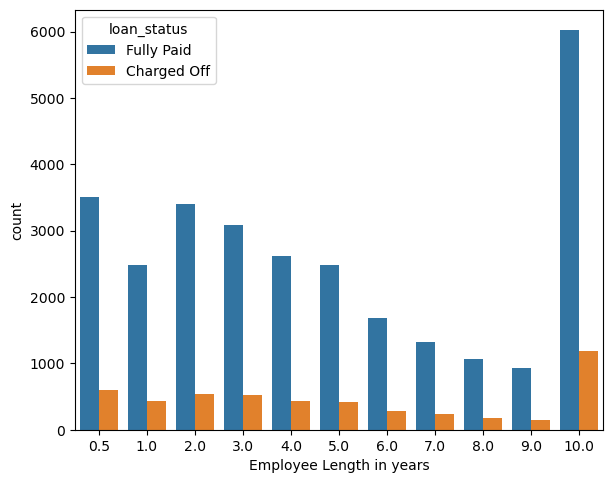

In [122]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sn.countplot(x ='emp_length_in_years', data = loan, hue='loan_status')
plt.xlabel('Employee Length in years')

**Insight**: There's very conflicting outcome if we consider employee lenght in the case defaulters. Those who have less than 2-3 years, or more than 10 years have higher chances for being defaulters. But if given a final approach, employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

> Category : Interest Rate

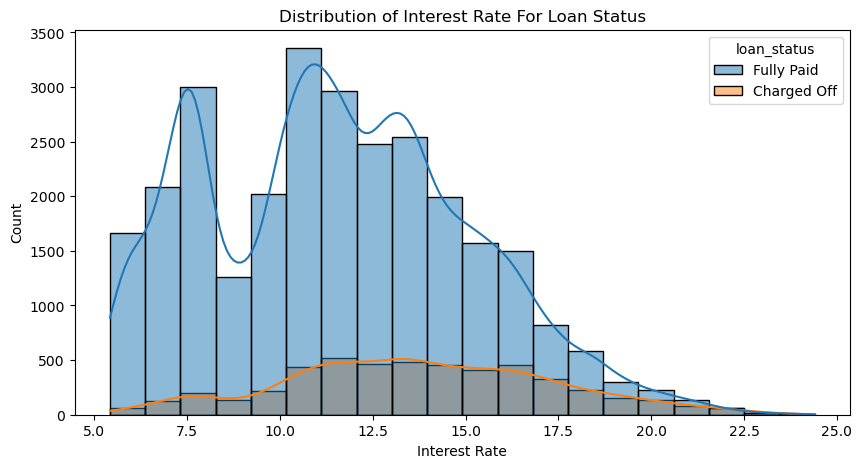

In [124]:
plt.figure(figsize=(10,5))
sn.histplot(data=loan,x='int_rate_%',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')b
plt.title('Distribution of Interest Rate For Loan Status')
plt.show()

**Insight:** The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.

> Category : Installments, Loan Amount, Funded Amount, DTI, and opened accounts

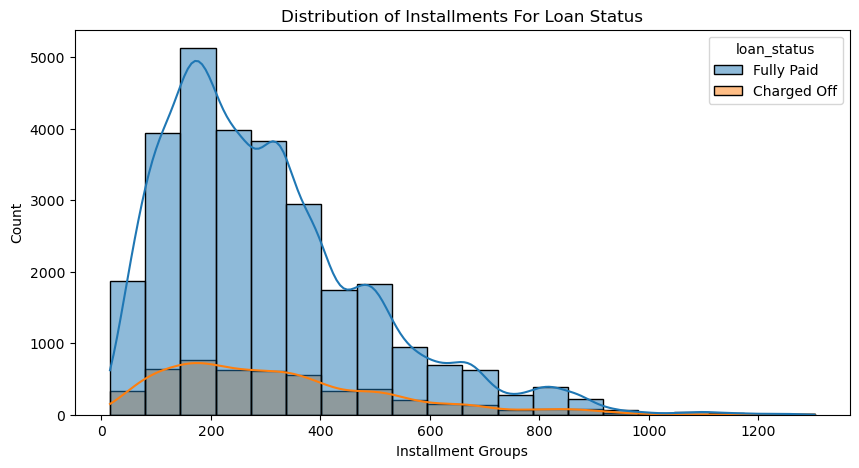

In [130]:
plt.figure(figsize=(10,5))
sn.histplot(data=loan,x='installment',hue='loan_status', bins=20, kde=True)
plt.xlabel('Installment Groups')
plt.ylabel('Count')
plt.title('Distribution of Installments For Loan Status')
plt.show()

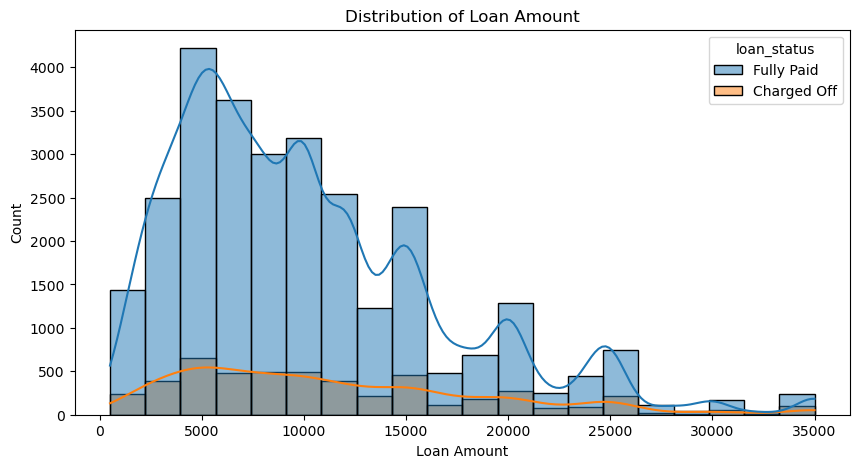

In [137]:
plt.figure(figsize=(10,5))
sn.histplot(data=loan,x='loan_amnt',hue='loan_status', bins=20, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount')
plt.show()

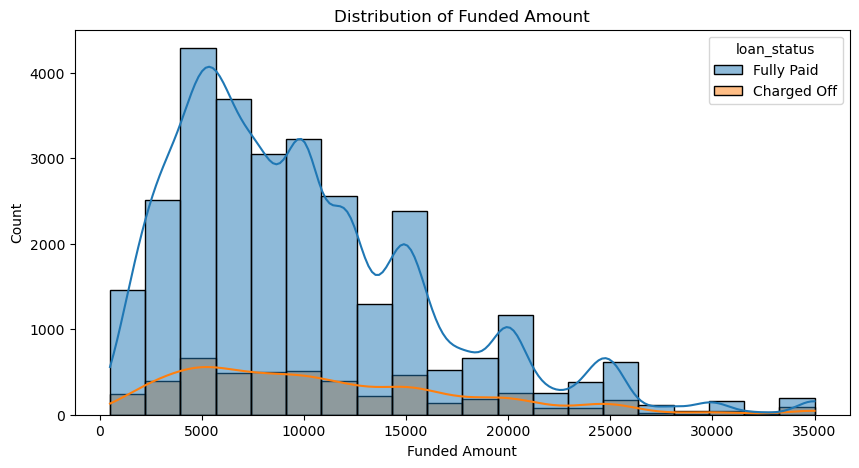

In [132]:
plt.figure(figsize=(10,5))
sn.histplot(data=loan,x='funded_amnt',hue='loan_status', bins=20, kde=True)
plt.xlabel('Funded Amount')
plt.ylabel('Count')
plt.title('Distribution of Funded Amount')
plt.show()

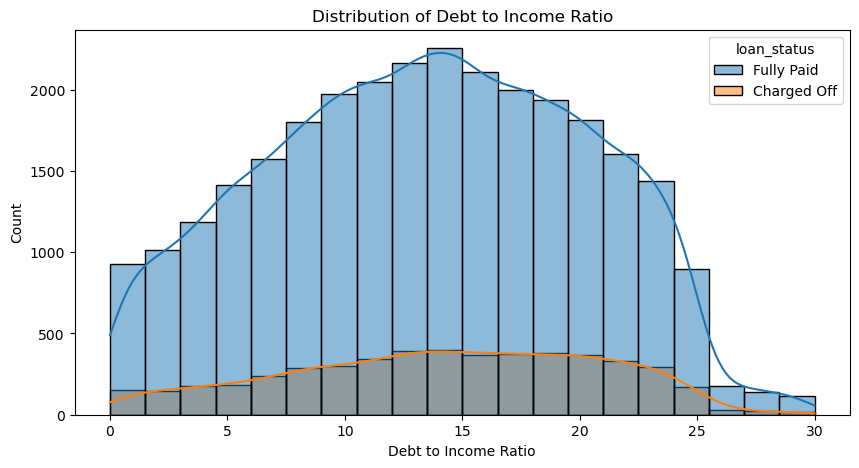

In [134]:
plt.figure(figsize=(10,5))
sn.histplot(data=loan,x='dti',hue='loan_status', bins=20, kde=True)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.title('Distribution of Debt to Income Ratio')
plt.show()

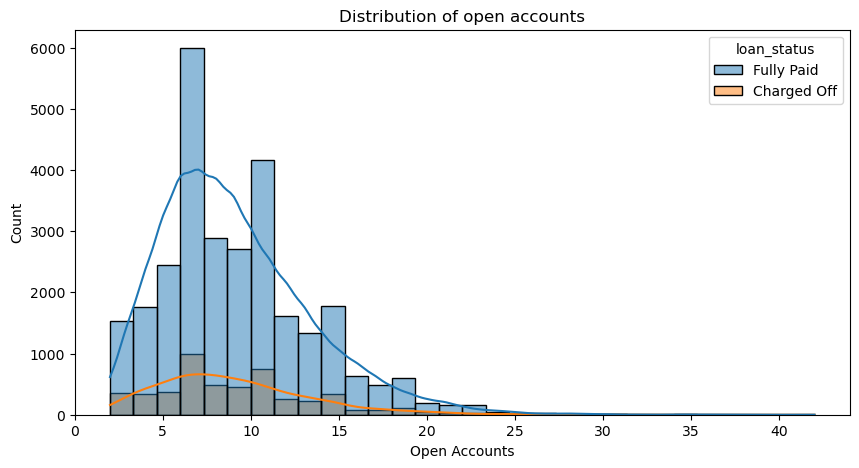

In [140]:
plt.figure(figsize=(10,5))
sn.histplot(data=loan,x='open_acc',hue='loan_status', bins=30, kde=True)
plt.xlabel('Open Accounts')
plt.ylabel('Count')
plt.title('Distribution of open accounts')
plt.show()

**Insight** : 
* If the installment amount are high i.e more than 400, or less than 150, people are less likely to be defaulters. In a similar fashion, if the loan amount is high, there is less possibility that borrowers can come up as defaulters. 
* There's very minor difference in loan amount requested and funded amount. 
* There's a normailsed data in the case of dti, as as dti value increses, the chance for defaulters also increase. But after a higher value beyond 25, there is major drop for defaulters.
* The more the opened account, less will be chances of defaulters


### `Bivariate Analysis`

> Category : Grade and Sub grade

<AxesSubplot:xlabel='grade', ylabel='count'>

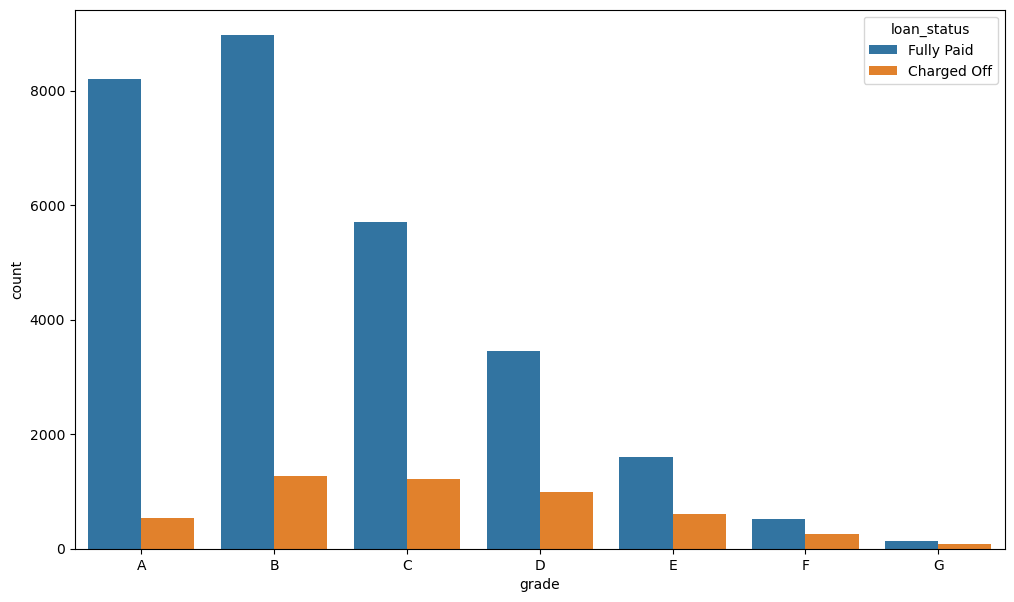

In [143]:
fig, ax = plt.subplots(figsize=(12,7))
sn.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,data = loan, hue='loan_status')

In [144]:
loan.sub_grade.head()

0    B2
1    C4
2    C5
3    C1
5    A4
Name: sub_grade, dtype: object

#### As there are many sub grades under one grade categories, so it will be very clumpsy as we need to analyse the distribution on the basis of sub grades. So, to simplify, we can assign the subcategories on the basis of respective numbers. e.g for B2 it will be 2, for C4 it will 4, and so on.

In [145]:
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))
loan.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

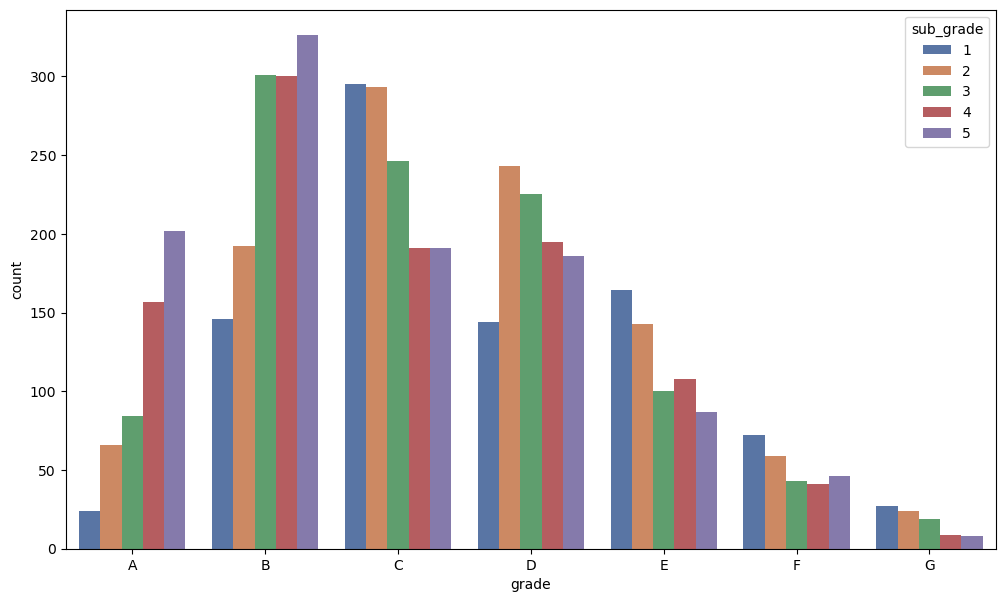

In [153]:
fig, ax = plt.subplots(figsize=(12,7))
sn.set_palette('deep')
sn.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan[loan.loan_status == 'Charged Off'])

**Insights**: 
* Grade B,C and D are more likely to be defaulters
* Also, the more the subgrade number, more will be the chances of defaulters

> But, we need to get in depth how grade will be assigned and what factors lead to assignment of loan

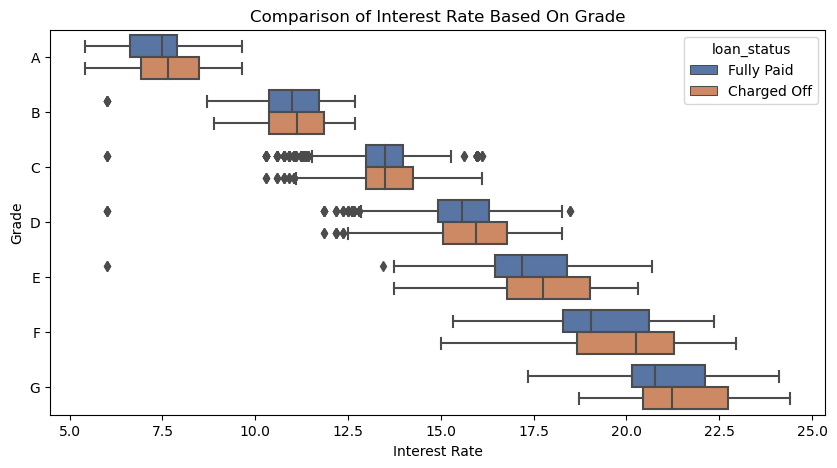

In [160]:
plt.figure(figsize=(10,5))
sn.boxplot(data=loan,x='int_rate_%',y='grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue='loan_status')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

**Insights:** Grade here represent risk factor. So, we can say interst rate increases with the risk.

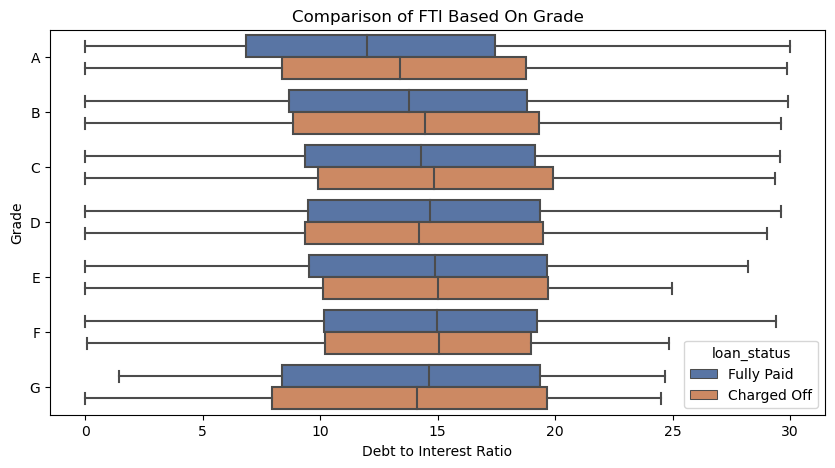

In [164]:
plt.figure(figsize=(10,5))
sn.boxplot(data=loan,x='dti',y='grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue='loan_status')
plt.xlabel('Debt to Interest Ratio')
plt.ylabel('Grade')
plt.title('Comparison of FTI Based On Grade',fontsize=12)
plt.show()

**Insight:** The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.

<Figure size 1000x500 with 0 Axes>

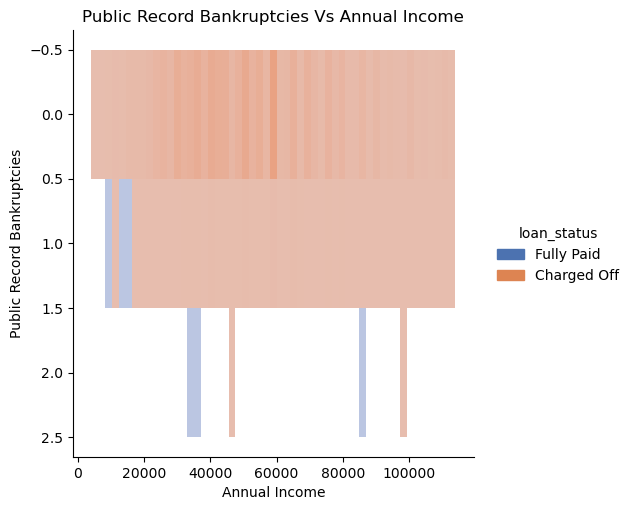

In [168]:
plt.figure(figsize=(10,5))
sn.displot(y=loan.pub_rec_bankruptcies.astype('category'),x=loan.annual_inc,hue=loan.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income')
plt.show()

**Insight:** The borrowers who have no record of Public Recorded Bankruptcy are safer choice for loan issue.

***

# `Final Insights`

### Univariate Analysis:
 * Burrowers with higher grades have been sanctioned large amount of loans
 * Majotiry of loans have sanctioned in the financial end of the year, whichh led to high risk of defaulters, as their purpose of loan is debt consolidation followed by credit card
 * The Verified status are more in case of loan sanctioning.
 * Majority of borrowsers have working experience greater than 10 years
 * The loan approval rate is increasing exponentially with the time
 * The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.
 * The loan term is mostly 36 months as compared to 60 months.
 * Majority of the borrowers have no record of Public Recorded Bankruptcy.

### Bivariate Analysis
 * Interest rate increases with risk factor, and thus is assigned accordingly with grade.
 * Lower the grade, lower the dti ratio and thus lower rate of defaulters.
